In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Logistic Regression

Logistic Regression is an algorithm used for **binary classification**.

## 1. Linear Regression

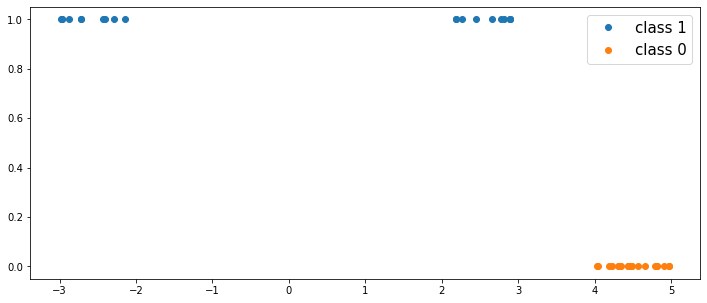

In [40]:
# toy example
x = np.zeros(40)
y = np.zeros(40)

x[0:10] = -3 + np.random.rand(10)
y[0:10] = 1

x[10:20] = 2 + np.random.rand(10)
y[10:20] = 1

x[20:40] = 4 + np.random.rand(20)
y[20:40] = 0

plt.figure(figsize=(12,5))
plt.plot(x[0:20] ,y[0:20],'o', label='class 1')
plt.plot(x[20:40],y[20:40],'o', label='class 0')
plt.legend(fontsize=15)

Let's fit a line $y=\theta_1x+\theta_0$ to the data

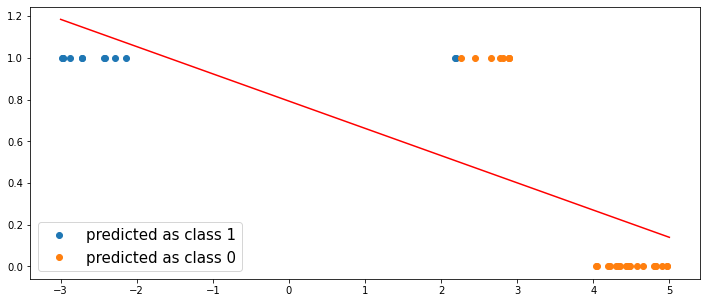

In [84]:
# matrix X
X = np.ones((40,2))
X[:,1] = x
# fit a line
theta = np.linalg.solve(X.T.dot(X),X.T.dot(y))
# class prediction
y_pred = X.dot(theta)
y_pred[y_pred>0.5] = 1
y_pred[y_pred<=0.5] = 0

# plot predictions
plt.figure(figsize=(12,5))
plt.plot(x[y_pred==1],y[y_pred==1],'o', label='predicted as class 1')
plt.plot(x[y_pred==0],y[y_pred==0],'o', label='predicted as class 0')

# plot linear regression model
x_plot = np.linspace(-3,5,100)
X_plot = np.ones((100,2))
X_plot[:,1] = x_plot
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-')

plt.legend(fontsize=15)

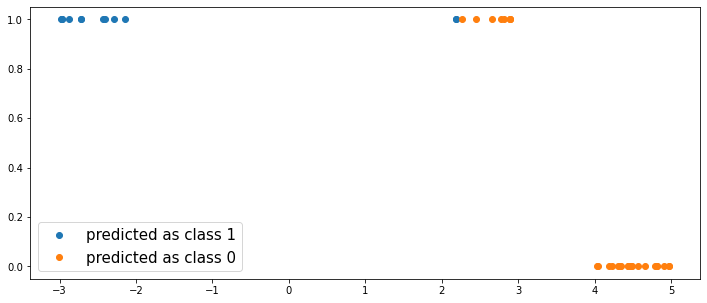

## 2. Logistic Regression

Logistic regression makes predictions using the formula:

$$
\mbox{prediction} \quad \widehat{p} = \sigma(x_1\theta_1+\theta_0) \quad \quad \mbox{where} \quad \quad 
\sigma(t) = \frac{1}{1+e^{-t}}
$$


The function $\sigma$ is called the **sigmoid function** (or logistic function)

In [1]:
'sigmoid function'
def sigmoid(t):
    return 1/(1+np.exp(-t))

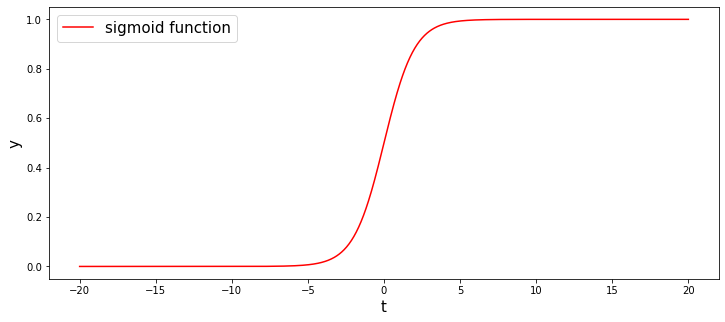

In [8]:
'plot sigmoid function'
x_plot = np.linspace(-20,20,1000)
y_plot = sigmoid(x_plot)
plt.figure(figsize=(12,5))
plt.plot(x_plot,y_plot,'r-', label='sigmoid function')
plt.xlabel('t',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.legend(fontsize=15)

We can transform the prediction $\widehat{y}$ to binary outcome using the rule

$$
\widehat{y} = \left\{\begin{array}{lr}
0 & \mbox { if }\quad \widehat{p}<0.5\\
1 & \mbox{ if }\quad \widehat{p}\geq 0.5
\end{array}\right.
$$

The logistic regression model is fitted using the **cost function**:

$$
E(\theta) = -\frac{1}{m}\sum_{i=1}^m\left[ y_i \log(\widehat{p}_i)+(1-y_i)\log(1-\widehat{p}_i) \right]
$$

In [44]:
'logistic regression cost function'
def logregression_cost(y,X,theta):
    m = len(y)
    return -1/m*(y.T@np.log(sigmoid(X@theta))+(1-y).T@np.log(1-sigmoid(X@theta)))

The **gradient** of the logistic regression model is given by

$$
\nabla E(\theta) = \frac{1}{m} X^T(\sigma(X\theta)-y)
$$

We can fit a logistic regression model using **Gradient Descent**

In [51]:
'Logistic regression with Gradient Descent'
def logregression_GD(X,y,learning_rate, n_epochs, return_cost=False):
    
    m,n = X.shape
    theta = np.random.randn(n)
    
    # initialize cost vector (only if return_cost = True)
    if return_cost:
        cost = np.zeros(n_epochs)
    
    # gradient descent steps
    for epoch in range(n_epochs):
        gradient = (1/m)*X.T@(sigmoid(X@theta)-y) # compute gradient
        theta = theta - learning_rate*gradient # Gradient Descent Step
        if return_cost:
            cost[epoch] = logregression_cost(y,X,theta) # compute the cost function
            
    results = {}
    results['coefficients'] = theta
    if return_cost:
        results['cost'] = cost
        
    return results

In [76]:
epochs = 10
lr = 10
results = logregression_GD(X,y, 
                           learning_rate=1,
                           n_epochs = 500,
                           return_cost = True
                          )

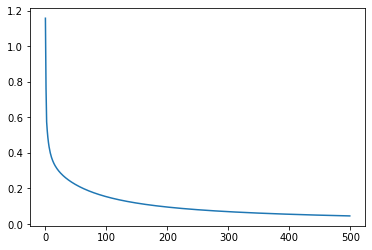

In [77]:
cost = results['cost']
plt.plot(cost)

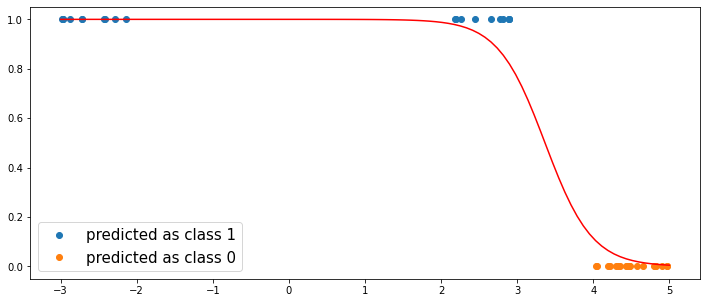

In [83]:
# plot results
plt.figure(figsize=(12,5))
# class predictions
p = sigmoid(X.dot(theta))
p[p>0.5]=1
p[p<=0.5]=0
# plot data points
plt.plot(x[p==1],y[p==1],'o', label='predicted as class 1')
plt.plot(x[p==0],y[p==0],'o', label='predicted as class 0')
# plot logistic regression model
theta = results['coefficients']
y_plot = sigmoid(X_plot.dot(theta))
plt.plot(x_plot,y_plot,'r-')

plt.legend(fontsize=15)

## 3. Example: Breast Cancer Dataset

In [85]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/log-regress/master/cancer.csv'
data_cancer = pd.read_csv(url,index_col=0)
data_cancer.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [91]:
data = data_cancer.iloc[:,:11]
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
data.to_csv(da)